In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
## stuff on NA columns

# LotFrontage: Linear feet of street connected to property. NA=0?
# Alley: NA = no alley
# MasVnrType: NA = no masonry veneer
# MasVnrArea: NA = 0
# BsmtQual: NA = no basement
# BsmtCond: NA = no basement
# BsmtExposure: NA = no basement
# BsmtFinType1: NA = no basement
# BsmtFinType2: NA = no basement
# Electrical: not clear, we may remove the observation
# FireplaceQu: NA = no fireplace
# Garage(X): NA = no garage
# PoolQC: NA = no pool
# Fence: NA = no fence
# MiscFeature: NA = no misc feature

def handle_na(df):
    use_na = [
        'Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure',
        'BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
        'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature'
    ]
    use_0 = [
        'LotFrontage','MasVnrArea','GarageCars','GarageArea'
    ]
    for key in use_na:
        df[key] = df[key].fillna('NA')
    for key in use_0:
        df[key] = df[key].fillna(0)
    df = df.dropna()
    return df

In [4]:
train = handle_na(train)

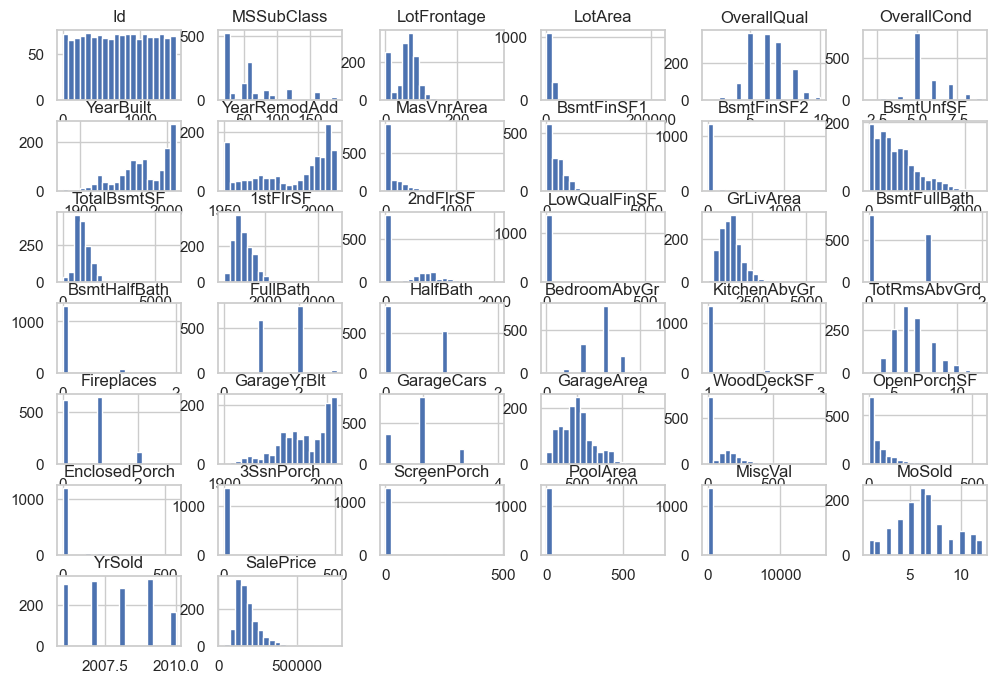

In [5]:
import seaborn as sns
# Set the plot style
sns.set(style='whitegrid')

# Select numerical columns and plot histograms
numerical_cols = train.select_dtypes(include=np.number).columns
train[numerical_cols].hist(figsize=(12, 8), bins=20)

# Add labels and titles
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Numerical Features')

# Show the plot
plt.show()

In [6]:
# Basic feature engineering / processing tasks

def feature_engineering(df):
    # drop garage year built & Id
    df = df.drop(['GarageYrBlt', 'Id'], axis=1)

    # combine month sold and year sold into one column
    df['SaleDate'] = df['MoSold']/12 + df['YrSold']
    df = df.drop(['MoSold', 'YrSold'], axis=1)

    # convert mssubclass to categorical
    df['MSSubClass'] = df['MSSubClass'].astype(str)

    # for everything that's not a numerical column, convert to categorical
    non_numerical_cols = df.select_dtypes(exclude=np.number).columns
    df[non_numerical_cols] = df[non_numerical_cols].astype('category')
    return df

train = feature_engineering(train)

In [7]:
# Get the categorical columns
categorical_cols = train.select_dtypes(include='category').columns

# Perform one-hot encoding
train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)

# Split into train and validation
train, val = train_test_split(train, test_size=0.2)

In [13]:
# Create an instance of the LinearRegression model
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(train.drop('SalePrice', axis=1), train['SalePrice'])

# Print the coefficients and intercept
# print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)

RandomForestRegressor()

In [17]:
train_pred = model.predict(train.drop('SalePrice', axis=1))
train_mse = mean_squared_error(train['SalePrice'], train_pred)
print('Train rMSE:', np.sqrt(train_mse))

val_pred = model.predict(val.drop('SalePrice', axis=1))
val_mse = mean_squared_error(val['SalePrice'], val_pred)
print('Val rMSE:', np.sqrt(val_mse))


Train rMSE: 11265.858557015263
Val rMSE: 31254.729849142783


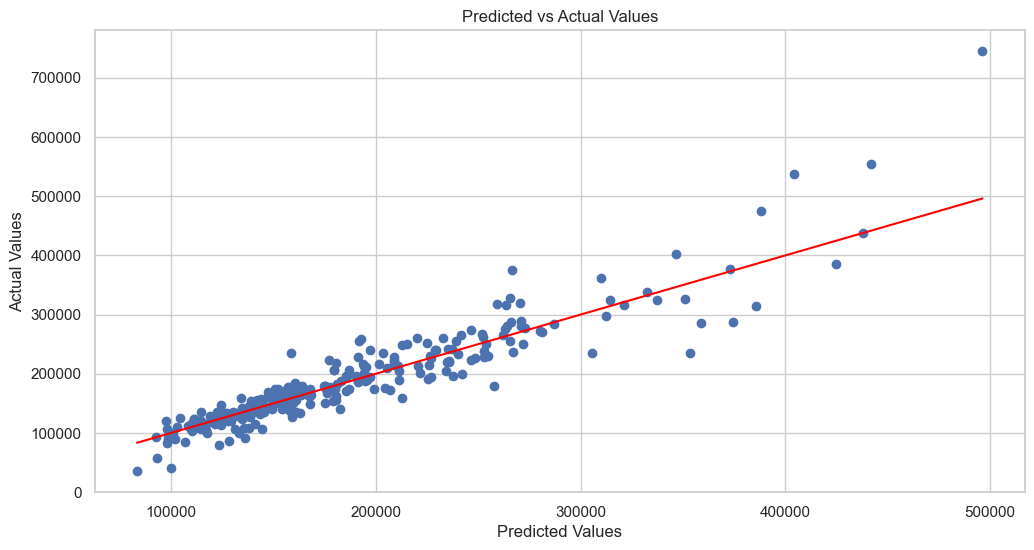

In [18]:
# # Plot the coefficients
# plt.figure(figsize=(12, 6))
# plt.bar(train.drop('SalePrice', axis=1).columns, model.coef_)
# plt.xlabel('Features')
# plt.ylabel('Coefficients')
# plt.title('Coefficients of Linear Regression Model')
# plt.xticks(rotation=90)
# plt.show()

# Plot the predicted vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(val_pred, val['SalePrice'])
plt.plot([min(val_pred), max(val_pred)], [min(val_pred), max(val_pred)], color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual Values')
plt.show()

In [29]:
# Create an instance of the LinearRegression model
lm = LinearRegression()

# Fit the model to the training data
lm.fit(train.drop('SalePrice', axis=1), train['SalePrice'])

rf = RandomForestRegressor()
rf.fit(train.drop('SalePrice', axis=1), train['SalePrice'])
# print('Feature importances:', rf.feature_importances_)


OverallQual     0.582293
GrLivArea       0.121508
TotalBsmtSF     0.041982
BsmtFinSF1      0.034130
1stFlrSF        0.030549
MasVnrArea      0.016574
LotArea         0.012334
2ndFlrSF        0.011215
YearBuilt       0.010918
GarageArea      0.010597
YearRemodAdd    0.009991
GarageCars      0.009599
LotFrontage     0.007502
TotRmsAbvGrd    0.006743
OpenPorchSF     0.006696
BsmtUnfSF       0.006083
SaleDate        0.004724
FullBath        0.004610
OverallCond     0.003984
WoodDeckSF      0.003337
dtype: float64


In [21]:
train_pred = lm.predict(train.drop('SalePrice', axis=1))
train_mse = mean_squared_error(train['SalePrice'], train_pred)
print('Train rMSE:', np.sqrt(train_mse))

val_pred = lm.predict(val.drop('SalePrice', axis=1))
val_mse = mean_squared_error(val['SalePrice'], val_pred)
print('Val rMSE:', np.sqrt(val_mse))


Train rMSE: 19126.985120023535
Val rMSE: 39986.651925200895


In [ ]:

# Plot the predicted vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(val_pred, val['SalePrice'])
plt.plot([min(val_pred), max(val_pred)], [min(val_pred), max(val_pred)], color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual Values')
plt.show()

In [45]:
# Get the feature importances
importances = pd.Series(rf.feature_importances_, index=train.drop('SalePrice', axis=1).columns)

# Sort the feature importances in descending order
importances_sorted = importances.sort_values(ascending=False)

# Print the sorted feature importances
print(importances_sorted.head(20))

# Select the top 20 features
top_20_features = importances_sorted.head(20).index

# Restrict the dataset to only the top 20 features
train_top_20 = train[top_20_features]
val_top_20 = val[top_20_features]

# Create new instances of the LinearRegression and RandomForestRegressor models
lm_top_20 = LinearRegression()
rf_top_20 = RandomForestRegressor(n_estimators=5000, max_depth=20)

# Fit the models to the training data with the top 20 features
lm_top_20.fit(train_top_20, train['SalePrice'])
rf_top_20.fit(train_top_20, train['SalePrice'])

# Predict on the training data with the top 20 features
train_pred_lm_top_20 = lm_top_20.predict(train_top_20)
train_pred_rf_top_20 = rf_top_20.predict(train_top_20)

# Compute the train RMSE for linear regression and random forest with the top 20 features
train_rmse_lm_top_20 = np.sqrt(mean_squared_error(train['SalePrice'], train_pred_lm_top_20))
train_rmse_rf_top_20 = np.sqrt(mean_squared_error(train['SalePrice'], train_pred_rf_top_20))

# Predict on the validation data with the top 20 features
val_pred_lm_top_20 = lm_top_20.predict(val_top_20)
val_pred_rf_top_20 = rf_top_20.predict(val_top_20)

# Compute the validation RMSE for linear regression and random forest with the top 20 features
val_rmse_lm_top_20 = np.sqrt(mean_squared_error(val['SalePrice'], val_pred_lm_top_20))
val_rmse_rf_top_20 = np.sqrt(mean_squared_error(val['SalePrice'], val_pred_rf_top_20))

# Print the train and validation RMSE for linear regression and random forest with the top 20 features
print('Linear Regression Train RMSE (Top 20 features):', train_rmse_lm_top_20)
print('Random Forest Train RMSE (Top 20 features):', train_rmse_rf_top_20)
print('Linear Regression Validation RMSE (Top 20 features):', val_rmse_lm_top_20)
print('Random Forest Validation RMSE (Top 20 features):', val_rmse_rf_top_20)


OverallQual     0.582293
GrLivArea       0.121508
TotalBsmtSF     0.041982
BsmtFinSF1      0.034130
1stFlrSF        0.030549
MasVnrArea      0.016574
LotArea         0.012334
2ndFlrSF        0.011215
YearBuilt       0.010918
GarageArea      0.010597
YearRemodAdd    0.009991
GarageCars      0.009599
LotFrontage     0.007502
TotRmsAbvGrd    0.006743
OpenPorchSF     0.006696
BsmtUnfSF       0.006083
SaleDate        0.004724
FullBath        0.004610
OverallCond     0.003984
WoodDeckSF      0.003337
dtype: float64
Linear Regression Train RMSE (Top 20 features): 36545.19882386641
Random Forest Train RMSE (Top 20 features): 11144.429828828162
Linear Regression Validation RMSE (Top 20 features): 35122.61152804421
Random Forest Validation RMSE (Top 20 features): 31847.88315590796
